I was having trouble replicating my predictions at the end and if you see anything that I missed so I can fix this code for later that would be awesome. Thank you!

In [1]:
import pandas as pd
from zipfile import ZipFile

# Path to the zip folder containing CSV files
zip_file_path = '/content/march-machine-learning-mania-2024.zip'

# Create an empty dictionary to store DataFrames
dfs = {}

# Open the zip file
with ZipFile(zip_file_path, 'r') as zip_file:
    # Iterate over each file in the zip folder
    for file_name in zip_file.namelist():
        # Check if the file is a CSV file
        if file_name.endswith('.csv'):
            # Extract the CSV file
            with zip_file.open(file_name) as csv_file:
                # Read the CSV file into a DataFrame
                df = pd.read_csv(csv_file, encoding='latin-1')
                # Store the DataFrame in the dictionary with the file name as the key
                dfs[file_name] = df


print(dfs.keys())  # Print the file names of all CSV files

dict_keys(['2024_tourney_seeds.csv', 'Cities.csv', 'Conferences.csv', 'MConferenceTourneyGames.csv', 'MGameCities.csv', 'MMasseyOrdinals_thruSeason2024_day128.csv', 'MNCAATourneyCompactResults.csv', 'MNCAATourneyDetailedResults.csv', 'MNCAATourneySeedRoundSlots.csv', 'MNCAATourneySeeds.csv', 'MNCAATourneySlots.csv', 'MRegularSeasonCompactResults.csv', 'MRegularSeasonDetailedResults.csv', 'MSeasons.csv', 'MSecondaryTourneyCompactResults.csv', 'MSecondaryTourneyTeams.csv', 'MTeamCoaches.csv', 'MTeamConferences.csv', 'MTeamSpellings.csv', 'MTeams.csv', 'sample_submission.csv'])


In [2]:
## Will be focusing on just these dfs for the analysis
#Women's tournament did not have ratings available for teams

RegularSeasonBoxScore = dfs['MRegularSeasonDetailedResults.csv']
TourneyBoxScore = dfs['MNCAATourneyDetailedResults.csv']
Seeds2024 = dfs['2024_tourney_seeds.csv']
Seeds = dfs['MNCAATourneySeeds.csv']
TourneySeedRoundSlot = dfs['MNCAATourneySeedRoundSlots.csv']
TourneySlots = dfs['MNCAATourneySlots.csv']
Ratings = dfs['MMasseyOrdinals_thruSeason2024_day128.csv']
Seasons = dfs['MSeasons.csv']
Teams = dfs['MTeams.csv']

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None)
# Assuming RegularSeasonBoxScore is your DataFrame

# Summing up statistics for winning teams
winning_stats = RegularSeasonBoxScore.groupby(['Season', 'WTeamID']).sum().reset_index()

# Summing up statistics for winning and losing teams
losing_stats = RegularSeasonBoxScore.groupby(['Season', 'LTeamID']).sum().reset_index()

losing_stats = losing_stats.drop(columns = ['WTeamID', 'DayNum', 'WLoc', 'NumOT'])
losing_stats

winning_stats = winning_stats.drop(columns = ['LTeamID', 'DayNum', 'WLoc', 'NumOT'])
winning_stats
renamed_columns = ['Season', 'TeamID', 'Score', 'Opp_Score'] + winning_stats.columns[4:].tolist()

# Assign the renamed columns to the DataFrame
winning_stats.columns = renamed_columns

winning_stats.columns = [col.replace('W', '') for col in winning_stats.columns]
winning_stats.columns = [col.replace('L', 'Opp_') for col in winning_stats.columns]
#clean stats for winning teams
winning_stats

#clean stats for losing teams
new_columns = ['Season', 'TeamID', 'Opp_Score', 'Score']
losing_stats.columns = new_columns + losing_stats.columns[4:].tolist()
losing_stats.columns = [col.replace('W', 'Opp_') for col in losing_stats.columns]
losing_stats.columns = [col.replace('L', '') for col in losing_stats.columns]
losing_stats

# Merging the two DataFrames on TeamID
merged_stats = pd.merge(winning_stats, losing_stats, on=['Season', 'TeamID'], suffixes=('_win', '_loss'), how='outer')



# Calculate the sum of corresponding columns
merged_stats = merged_stats.fillna(0)  # Replace NaN with 0 for teams that only had wins or losses
for col in winning_stats.columns[2:]:
    if col.endswith('_win'):
        merged_stats[col] = merged_stats[col + '_win']
    elif col.endswith('_loss'):
        merged_stats[col] = merged_stats[col + '_loss']
    else:
        merged_stats[col] = merged_stats[col + '_win'] + merged_stats[col + '_loss']

# Drop unnecessary columns
merged_stats = merged_stats.drop(columns=[col + '_win' for col in winning_stats.columns[2:]] + [col + '_loss' for col in winning_stats.columns[2:]])
#final total stats for all teams regular season from 2003 to 2024
merged_stats.sort_values(by = 'Season')

,Season,TeamID,Score,Opp_Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Opp_FGM,Opp_FGA,Opp_FGM3,Opp_FGA3,Opp_FTM,Opp_FTA,Opp_OR,Opp_DR,Opp_Ast,Opp_TO,Opp_Stl,Opp_Blk,Opp_PF
0,2003,1102,1603.0,1596.0,536.0,1114.0,219.0,583.0,312.0,479.0,117.0,471.0,364.0,320.0,167.0,50.0,525.0,540.0,1188.0,133.0,348.0,383.0,539.0,269.0,564.0,256.0,363.0,152.0,44.0,514.0
222,2003,1351,1875.0,1920.0,667.0,1596.0,194.0,643.0,347.0,473.0,307.0,639.0,370.0,375.0,203.0,97.0,504.0,660.0,1554.0,184.0,537.0,416.0,559.0,338.0,686.0,447.0,406.0,184.0,70.0,458.0
221,2003,1350,1840.0,1744.0,641.0,1539.0,186.0,545.0,372.0,530.0,312.0,624.0,365.0,343.0,185.0,111.0,511.0,597.0,1480.0,178.0,531.0,372.0,532.0,336.0,664.0,303.0,428.0,132.0,62.0,513.0
220,2003,1349,1967.0,1902.0,682.0,1480.0,169.0,436.0,434.0,582.0,291.0,635.0,413.0,446.0,218.0,87.0,553.0,658.0,1516.0,156.0,409.0,430.0,595.0,326.0,589.0,385.0,435.0,189.0,95.0,513.0
219,2003,1348,2049.0,2037.0,710.0,1779.0,157.0,514.0,472.0,706.0,446.0,667.0,384.0,398.0,239.0,70.0,588.0,707.0,1640.0,191.0,594.0,432.0,625.0,344.0,735.0,397.0,479.0,195.0,125.0,606.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7365,2024,1227,2220.0,2313.0,806.0,1861.0,273.0,759.0,335.0,484.0,212.0,736.0,431.0,381.0,196.0,165.0,567.0,802.0,1854.0,209.0,649.0,500.0,666.0,241.0,824.0,420.0,366.0,212.0,116.0,466.0
7364,2024,1226,2220.0,2296.0,806.0,1774.0,200.0,621.0,408.0,594.0,270.0,644.0,369.0,337.0,215.0,110.0,524.0,845.0,1722.0,186.0,517.0,420.0,562.0,222.0,676.0,398.0,367.0,203.0,74.0,572.0
7363,2024,1225,1986.0,2184.0,716.0,1651.0,227.0,677.0,327.0,441.0,179.0,634.0,350.0,325.0,166.0,91.0,538.0,759.0,1627.0,224.0,626.0,442.0,605.0,230.0,718.0,404.0,316.0,194.0,106.0,447.0
7372,2024,1234,2654.0,2527.0,963.0,2025.0,208.0,600.0,520.0,668.0,261.0,770.0,570.0,293.0,221.0,125.0,541.0,906.0,1981.0,252.0,699.0,463.0,655.0,321.0,772.0,483.0,368.0,188.0,120.0,559.0


In [4]:
## Adding advanced stats to hopefully better predict winners by analyzing on a per possession basis


#Possesions = Field Goal Attempts - Offensive Rebounds + Turnovers + (0.44 x Free throw attempts)
merged_stats['Possessions'] = round(merged_stats['FGA'] - merged_stats['OR'] + merged_stats['TO'] + (merged_stats['FTA'] * 0.44),)

merged_stats['Opp_Possessions'] = round(merged_stats['Opp_FGA'] - merged_stats['Opp_OR'] + merged_stats['Opp_TO'] + merged_stats['Opp_FTA'] * 0.44)

#Offensive Rating, Defensive Rating and Net Rating
merged_stats['OffRating'] = merged_stats['Score'] / merged_stats['Possessions'] * 100
merged_stats['DefRating'] = merged_stats['Opp_Score'] / merged_stats['Opp_Possessions'] * 100
merged_stats['NetRating'] = merged_stats['OffRating'] - merged_stats['DefRating']


#Effective FG% (Field Goals Made + 0.5 * Three-Point Field Goals Made) / Field Goals Attempted.
merged_stats['eFG%'] = (merged_stats['FGM'] + 0.5 * merged_stats['FGM3']) / merged_stats['FGA']
merged_stats['Opp_eFG%'] = (merged_stats['Opp_FGM'] + 0.5 * merged_stats['Opp_FGM3']) / merged_stats['Opp_FGA']

#Turnover percentage
merged_stats['TO%'] = merged_stats['TO'] / merged_stats['Possessions']
merged_stats['Opp_TO%'] = merged_stats['Opp_TO'] / merged_stats['Opp_Possessions']

# Winning Team Rebound percentage
merged_stats['TotalReb'] = merged_stats['DR'] + merged_stats['OR']
merged_stats['Opp_TotalReb'] = merged_stats['Opp_DR'] + merged_stats['Opp_OR']

merged_stats['Reb%'] = merged_stats['TotalReb'] / (merged_stats['TotalReb'] + merged_stats['Opp_TotalReb'])
merged_stats['Opp_Reb%'] = merged_stats['Opp_TotalReb'] / (merged_stats['Opp_TotalReb'] + merged_stats['TotalReb'])

#Winning Team Free Throw Rate
merged_stats['FTr'] = merged_stats['FTM'] / merged_stats['FGA']
merged_stats['Opp_FTr'] = merged_stats['Opp_FTM'] / merged_stats['Opp_FGA']

merged_stats.sort_values(by = 'Season')

,Season,TeamID,Score,Opp_Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Opp_FGM,Opp_FGA,Opp_FGM3,Opp_FGA3,Opp_FTM,Opp_FTA,Opp_OR,Opp_DR,Opp_Ast,Opp_TO,Opp_Stl,Opp_Blk,Opp_PF,Possessions,Opp_Possessions,OffRating,DefRating,NetRating,eFG%,Opp_eFG%,TO%,Opp_TO%,TotalReb,Opp_TotalReb,Reb%,Opp_Reb%,FTr,Opp_FTr
0,2003,1102,1603.0,1596.0,536.0,1114.0,219.0,583.0,312.0,479.0,117.0,471.0,364.0,320.0,167.0,50.0,525.0,540.0,1188.0,133.0,348.0,383.0,539.0,269.0,564.0,256.0,363.0,152.0,44.0,514.0,1528.0,1519.0,104.908377,105.069124,-0.160747,0.579443,0.510522,0.209424,0.238973,588.0,833.0,0.413793,0.586207,0.280072,0.322391
222,2003,1351,1875.0,1920.0,667.0,1596.0,194.0,643.0,347.0,473.0,307.0,639.0,370.0,375.0,203.0,97.0,504.0,660.0,1554.0,184.0,537.0,416.0,559.0,338.0,686.0,447.0,406.0,184.0,70.0,458.0,1872.0,1868.0,100.160256,102.783726,-2.623469,0.478697,0.483912,0.200321,0.217345,946.0,1024.0,0.480203,0.519797,0.217419,0.267696
221,2003,1350,1840.0,1744.0,641.0,1539.0,186.0,545.0,372.0,530.0,312.0,624.0,365.0,343.0,185.0,111.0,511.0,597.0,1480.0,178.0,531.0,372.0,532.0,336.0,664.0,303.0,428.0,132.0,62.0,513.0,1803.0,1806.0,102.052135,96.566999,5.485136,0.476933,0.463514,0.190238,0.236988,936.0,1000.0,0.483471,0.516529,0.241715,0.251351
220,2003,1349,1967.0,1902.0,682.0,1480.0,169.0,436.0,434.0,582.0,291.0,635.0,413.0,446.0,218.0,87.0,553.0,658.0,1516.0,156.0,409.0,430.0,595.0,326.0,589.0,385.0,435.0,189.0,95.0,513.0,1891.0,1887.0,104.019038,100.794913,3.224125,0.517905,0.485488,0.235854,0.230525,926.0,915.0,0.502988,0.497012,0.293243,0.283641
219,2003,1348,2049.0,2037.0,710.0,1779.0,157.0,514.0,472.0,706.0,446.0,667.0,384.0,398.0,239.0,70.0,588.0,707.0,1640.0,191.0,594.0,432.0,625.0,344.0,735.0,397.0,479.0,195.0,125.0,606.0,2042.0,2050.0,100.342801,99.365854,0.976948,0.443227,0.489329,0.194907,0.233659,1113.0,1079.0,0.507755,0.492245,0.265318,0.263415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7365,2024,1227,2220.0,2313.0,806.0,1861.0,273.0,759.0,335.0,484.0,212.0,736.0,431.0,381.0,196.0,165.0,567.0,802.0,1854.0,209.0,649.0,500.0,666.0,241.0,824.0,420.0,366.0,212.0,116.0,466.0,2243.0,2272.0,98.974588,101.804577,-2.829990,0.506448,0.488943,0.169862,0.161092,948.0,1065.0,0.470939,0.529061,0.180011,0.269687
7364,2024,1226,2220.0,2296.0,806.0,1774.0,200.0,621.0,408.0,594.0,270.0,644.0,369.0,337.0,215.0,110.0,524.0,845.0,1722.0,186.0,517.0,420.0,562.0,222.0,676.0,398.0,367.0,203.0,74.0,572.0,2102.0,2114.0,105.613701,108.609272,-2.995570,0.510710,0.544715,0.160324,0.173605,914.0,898.0,0.504415,0.495585,0.229989,0.243902
7363,2024,1225,1986.0,2184.0,716.0,1651.0,227.0,677.0,327.0,441.0,179.0,634.0,350.0,325.0,166.0,91.0,538.0,759.0,1627.0,224.0,626.0,442.0,605.0,230.0,718.0,404.0,316.0,194.0,106.0,447.0,1991.0,1979.0,99.748870,110.358767,-10.609897,0.502423,0.535341,0.163235,0.159677,813.0,948.0,0.461670,0.538330,0.198062,0.271666
7372,2024,1234,2654.0,2527.0,963.0,2025.0,208.0,600.0,520.0,668.0,261.0,770.0,570.0,293.0,221.0,125.0,541.0,906.0,1981.0,252.0,699.0,463.0,655.0,321.0,772.0,483.0,368.0,188.0,120.0,559.0,2351.0,2316.0,112.888133,109.110535,3.777597,0.526914,0.520949,0.124628,0.158895,1031.0,1093.0,0.485405,0.514595,0.256790,0.233720


In [5]:
#Average of all ratings for a team for its whole regular season


# Group by 'TeamID', 'Season', and 'SystemName' and calculate the average rank for each combination
average_rank_per_system = Ratings.groupby(['TeamID', 'Season', 'SystemName'])['OrdinalRank'].mean()

# Reset the index to turn 'TeamID', 'Season', and 'SystemName' into regular columns
average_rank_per_system = average_rank_per_system.reset_index()

# Group by 'TeamID' and 'Season' again and calculate the average rank across all rating systems for each team and season
average_rank_per_season = average_rank_per_system.groupby(['TeamID', 'Season'])['OrdinalRank'].mean()

# Reset the index to turn 'TeamID' and 'Season' into regular columns
average_rank_per_season = average_rank_per_season.reset_index()

# Now 'average_rank_per_season' DataFrame contains the average rank for each team and season across all rating systems
average_rank_per_season.sort_values(by = 'OrdinalRank')

,TeamID,Season,OrdinalRank
1618,1181,2006,1.292660
2993,1246,2015,1.296648
2282,1211,2021,1.463468
1631,1181,2019,1.952138
7019,1437,2018,2.195432
...,...,...,...
3177,1254,2023,356.860622
1267,1164,2024,357.568642
2361,1216,2023,357.951226
3936,1290,2024,358.403034


In [6]:
merged_df = average_rank_per_season.merge(Teams, on='TeamID', how='inner')
merged_df = merged_df.drop(columns = ['FirstD1Season', 'LastD1Season'])
merged_df.sort_values(by='OrdinalRank')
top10ratedteams = merged_df.sort_values(by='OrdinalRank').head(10)
top10ratedteams

,TeamID,Season,OrdinalRank,TeamName
1618,1181,2006,1.292660,Duke
2993,1246,2015,1.296648,Kentucky
2282,1211,2021,1.463468,Gonzaga
1631,1181,2019,1.952138,Duke
7019,1437,2018,2.195432,Villanova
5053,1345,2024,2.211638,Purdue
2492,1222,2023,2.363480,Houston
447,1124,2021,2.487242,Baylor
2904,1242,2011,2.554393,Kansas
2903,1242,2010,2.655054,Kansas


In [7]:
# Win Loss record and W%

# Initialize an empty list to store the team records
team_records_list = []

# Iterate through the rows of the 'RegularSeasonBoxScore' DataFrame
for index, row in RegularSeasonBoxScore.iterrows():
    # Extract the season and team IDs
    season = row['Season']
    winning_team = row['WTeamID']
    losing_team = row['LTeamID']



    # Update the wins for the winning team

    team_records_list.append({'TeamID': winning_team, 'Season': season, 'Wins': 1, 'Losses': 0})

    # Update the losses for the losing team

    team_records_list.append({'TeamID': losing_team, 'Season': season, 'Wins': 0, 'Losses': 1})

# Convert the list of team records to a DataFrame
team_records = pd.DataFrame(team_records_list)

# Group by TeamID and Season and aggregate the wins and losses
team_records = team_records.groupby(['TeamID', 'Season']).sum().reset_index()

# Now 'team_records' DataFrame contains the wins and losses for each team in each season
team_records

,TeamID,Season,Wins,Losses
0,1101,2014,2,19
1,1101,2015,7,21
2,1101,2016,9,18
3,1101,2017,9,16
4,1101,2018,12,15
...,...,...,...,...
7612,1476,2023,13,17
7613,1476,2024,3,27
7614,1477,2023,12,20
7615,1477,2024,10,20


In [8]:
merged_df2 = pd.merge(merged_df, team_records, on=['Season', 'TeamID'], how='left')


merged_df3 = pd.merge(merged_df2, Seeds, on=['Season', 'TeamID'], how='left')


final_df = pd.merge(merged_df3, merged_stats, on = ['Season', 'TeamID'], how = 'left')
final_df['Total Games'] = final_df['Wins'] + final_df['Losses']
final_df['Win%'] = final_df['Wins'] / final_df['Total Games']




# Divide each box score column by total games to get per game statistic
final_df.iloc[:, 7:37] = final_df.iloc[:, 7:37].div(final_df["Total Games"], axis=0)
final_df['TotalReb'] = final_df['TotalReb'] / final_df['Total Games']
final_df['Opp_TotalReb'] = final_df['Opp_TotalReb'] / final_df['Total Games']
final_df.dropna(subset=['Seed'], inplace=True)
final_df['Seed'] = final_df['Seed'].str.extract(r'(\d+)')
final_df['Seed'] = final_df['Seed'].astype(int)
final_df.sort_values(by = 'NetRating', ascending= False)

# All counting stats are now per game and advanced stats are based on a team's performance across all possessions of a season
# Dropping teams that didn't make tournament or couldnt because of COVID



,TeamID,Season,OrdinalRank,TeamName,Wins,Losses,Seed,Score,Opp_Score,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,Opp_FGM,Opp_FGA,Opp_FGM3,Opp_FGA3,Opp_FTM,Opp_FTA,Opp_OR,Opp_DR,Opp_Ast,Opp_TO,Opp_Stl,Opp_Blk,Opp_PF,Possessions,Opp_Possessions,OffRating,DefRating,NetRating,eFG%,Opp_eFG%,TO%,Opp_TO%,TotalReb,Opp_TotalReb,Reb%,Opp_Reb%,FTr,Opp_FTr,Total Games,Win%
2280,1211,2019,4.445265,Gonzaga,30.0,3.0,1,88.848485,65.060606,32.181818,60.515152,7.787879,21.333333,16.696970,21.757576,9.545455,29.090909,18.212121,10.363636,7.545455,5.484848,16.060606,23.878788,61.454545,6.575758,21.272727,10.727273,15.424242,10.818182,21.606061,9.818182,13.545455,5.151515,1.939394,18.696970,70.909091,70.969697,125.299145,91.673783,33.625362,0.596144,0.442061,0.146154,0.190863,38.636364,32.424242,0.543710,0.456290,0.275914,0.174556,33.0,0.909091
2993,1246,2015,1.296648,Kentucky,34.0,0.0,1,74.911765,53.970588,25.970588,55.411765,5.441176,15.558824,17.529412,24.264706,12.911765,25.264706,14.705882,10.617647,6.558824,6.882353,17.029412,19.147059,54.000000,4.588235,16.764706,11.088235,17.088235,11.705882,19.029412,7.676471,14.058824,4.676471,2.323529,19.911765,63.794118,63.882353,117.427386,84.484346,32.943040,0.517781,0.397059,0.166436,0.220074,38.176471,30.735294,0.553991,0.446009,0.316348,0.205338,34.0,1.000000
2278,1211,2017,4.213381,Gonzaga,32.0,1.0,1,84.575758,61.151515,30.363636,58.636364,7.303030,19.121212,16.545455,22.424242,9.363636,30.939394,16.030303,11.303030,7.151515,4.454545,16.454545,22.454545,61.030303,5.818182,19.393939,10.424242,15.848485,10.515152,22.000000,9.636364,12.515152,5.212121,2.636364,19.606061,70.454545,70.000000,120.043011,87.359307,32.683703,0.580103,0.415591,0.160430,0.178788,40.303030,32.515152,0.553475,0.446525,0.282171,0.170804,33.0,0.969697
2283,1211,2022,3.761132,Gonzaga,26.0,3.0,1,87.827586,65.344828,32.931034,62.482759,8.379310,22.137931,13.586207,18.586207,8.344828,29.965517,18.103448,11.620690,6.655172,5.724138,15.413793,24.379310,64.275862,6.689655,21.758621,9.896552,14.241379,7.896552,21.793103,9.896552,11.586207,6.241379,2.655172,17.827586,73.931034,74.241379,118.796642,88.016721,30.779921,0.594095,0.431330,0.157183,0.156061,38.310345,29.689655,0.563387,0.436613,0.217439,0.153970,29.0,0.896552
3232,1257,2014,13.451229,Louisville,29.0,5.0,4,82.117647,60.970588,28.911765,61.029412,8.058824,21.705882,16.235294,24.647059,13.705882,24.176471,15.676471,10.294118,10.117647,4.617647,19.500000,21.147059,53.676471,4.794118,16.470588,13.882353,20.500000,11.852941,23.058824,10.529412,17.441176,4.323529,2.823529,20.294118,68.470588,68.294118,119.931271,89.276486,30.654786,0.539759,0.438630,0.150344,0.255383,37.882353,34.911765,0.520404,0.479596,0.266024,0.258630,34.0,0.852941
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3920,1290,2008,296.167840,MS Valley St,15.0,15.0,16,61.033333,65.633333,20.900000,52.333333,4.600000,13.066667,14.633333,21.766667,11.500000,21.533333,11.000000,14.366667,5.700000,2.666667,17.466667,23.700000,52.966667,5.200000,16.633333,13.033333,19.866667,11.333333,23.933333,11.933333,15.100000,6.233333,3.533333,19.466667,64.766667,65.466667,94.235718,100.254582,-6.018865,0.443312,0.496539,0.221822,0.230652,33.033333,35.266667,0.483651,0.516349,0.279618,0.246067,30.0,0.500000
6478,1411,2023,289.102088,TX Southern,12.0,20.0,16,67.937500,72.906250,24.812500,58.875000,4.750000,16.562500,13.562500,20.562500,9.343750,23.437500,11.000000,14.000000,6.437500,3.062500,19.000000,25.218750,58.062500,6.812500,20.250000,15.656250,22.093750,8.343750,24.906250,11.906250,13.000000,7.687500,3.406250,18.906250,72.593750,72.437500,93.585880,100.647110,-7.061229,0.461783,0.493003,0.192854,0.179465,32.781250,33.250000,0.496451,0.503549,0.230361,0.269645,32.0,0.375000
2463,1221,2016,274.389955,Holy Cross,14.0,19.0,16,65.333333,69.666667,22.333333,54.09090

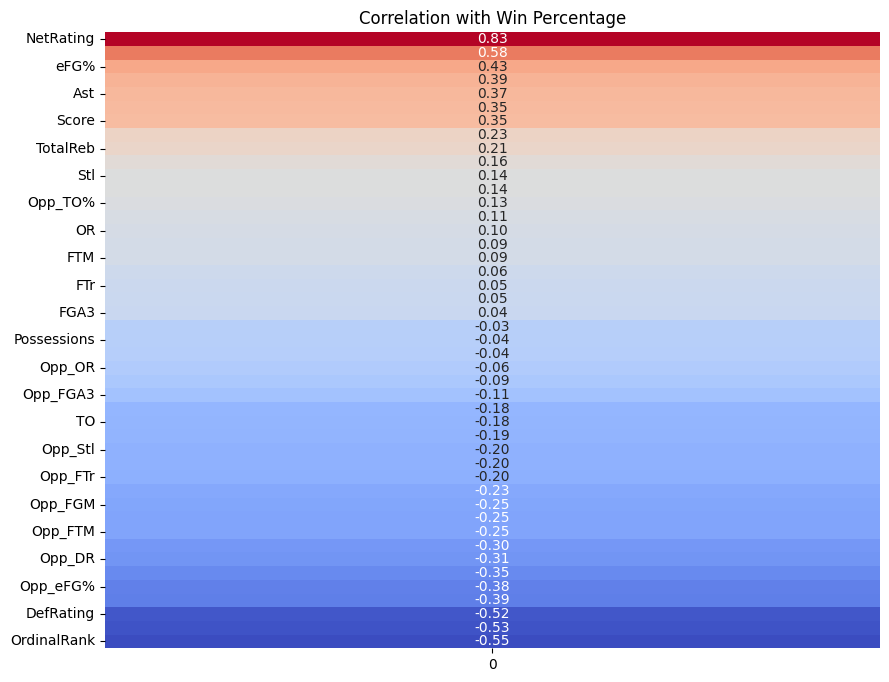

NetRating          0.827740
OffRating          0.580024
eFG%               0.434692
Reb%               0.388485
Ast                0.365073
FGM                0.354213
Score              0.352088
DR                 0.225699
TotalReb           0.211812
Blk                0.161287
Stl                0.138051
FGM3               0.137039
Opp_TO%            0.125025
Opp_TO             0.108034
OR                 0.096841
FGA                0.089760
FTM                0.088233
FTA                0.062656
FTr                0.047184
Opp_PF             0.046914
FGA3               0.038003
Opp_Possessions   -0.033716
Possessions       -0.037390
Opp_FGA           -0.044049
Opp_OR            -0.064955
PF                -0.085002
Opp_FGA3          -0.114479
TO%               -0.178574
TO                -0.182726
Opp_Blk           -0.189294
Opp_Stl           -0.199472
Opp_FGM3          -0.199777
Opp_FTr           -0.204654
Opp_FTA           -0.232954
Opp_FGM           -0.247754
Opp_TotalReb      -0

In [9]:
# Correlating each stat to W%

correlation_df = final_df.drop(['TeamID', 'Season', 'TeamName', 'Total Games', 'Wins', 'Losses'], axis=1)

import seaborn as sns
import matplotlib.pyplot as plt
correlation_df.dtypes
# Compute correlations
correlation_matrix = correlation_df.corrwith(correlation_df['Win%']).sort_values(ascending=False)

# Remove the 'W%' column from the correlation matrix
correlation_matrix = correlation_matrix.drop('Win%')

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", cbar=False)
plt.title('Correlation with Win Percentage')
plt.show()

print(correlation_matrix)

# Correlation Analysis

In an effort to lower the amount of features correlation analysis was conducted. This analysis revealed that NetRating was the single most important measurement to winning basketball games. Not to say the 4 factor measurements aren't effective as eFG% and Reb% had coefficients of .434 and .388, respectively. I feel comfortable enough in moving forward with just 4 factors and Rating statistics as combined they capture more information about winning basketball teams than the traditional counting stats were able to.


This will also help to clean up the large excess of columns currently.

In [10]:
start_index = final_df.columns.get_loc('Score')

end_index = final_df.columns.get_loc('Opp_Possessions')

column_range = list(range(start_index, end_index + 1))

final_df2 = final_df.drop(final_df.columns[column_range], axis=1)

final_df2 = final_df2.drop(columns = ['TotalReb', 'Opp_TotalReb', 'Total Games'])

final_df2.sort_values(by = 'Season')

,TeamID,Season,OrdinalRank,TeamName,Wins,Losses,Seed,OffRating,DefRating,NetRating,eFG%,Opp_eFG%,TO%,Opp_TO%,Reb%,Opp_Reb%,FTr,Opp_FTr,Win%
4137,1301,2003,56.005974,NC State,18.0,12.0,9,108.383234,102.153230,6.230004,0.530937,0.494981,0.212575,0.219830,0.498431,0.501569,0.295625,0.289837,0.600000
6720,1423,2003,64.654383,UNC Wilmington,24.0,6.0,11,108.295397,90.715373,17.580024,0.521572,0.455010,0.174001,0.257737,0.485812,0.514188,0.222222,0.231015,0.800000
4663,1328,2003,14.847832,Oklahoma,24.0,6.0,1,110.507246,92.754368,17.752878,0.512972,0.446284,0.183230,0.211202,0.530758,0.469242,0.232901,0.234853,0.800000
1180,1161,2003,99.578972,Colorado St,17.0,13.0,14,108.663730,107.601185,1.062545,0.547025,0.498550,0.236907,0.181145,0.524490,0.475510,0.326296,0.267401,0.566667
1615,1181,2003,9.802392,Duke,24.0,6.0,3,112.385740,97.148114,15.237626,0.514365,0.481633,0.192413,0.246090,0.514179,0.485821,0.329834,0.268222,0.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3517,1270,2024,90.383980,McNeese St,26.0,3.0,12,118.427902,96.068288,22.359614,0.549150,0.478065,0.131702,0.216762,0.515085,0.484915,0.282160,0.241935,0.896552
1592,1179,2024,52.625728,Drake,27.0,6.0,10,114.279551,100.778547,13.501005,0.549339,0.509554,0.126402,0.168685,0.512219,0.487781,0.248728,0.217622,0.818182
3429,1266,2024,12.727161,Marquette,25.0,9.0,2,112.084211,100.466299,11.617911,0.550917,0.496692,0.138947,0.194574,0.481066,0.518934,0.182915,0.212723,0.735294
3737,1280,2024,33.819426,Mississippi St,21.0,13.0,8,107.848961,99.407282,8.441679,0.516726,0.476809,0.177344,0.170195,0.543756,0.456244,0.254942,0.243119,0.617647


,Season,DayNum,ATeamID,AScore,BTeamID,BScore,A_Win
0,2003,134,1153,57,1217,61,0
1,2003,136,1112,80,1436,51,1
2,2003,136,1113,84,1272,71,1
3,2003,136,1141,79,1166,73,1
4,2003,136,1143,76,1301,74,1
...,...,...,...,...,...,...,...
1310,2023,146,1274,88,1400,81,1
1311,2023,146,1451,59,1112,68,0
1312,2023,152,1163,72,1274,59,1
1313,2023,152,1211,69,1403,71,0


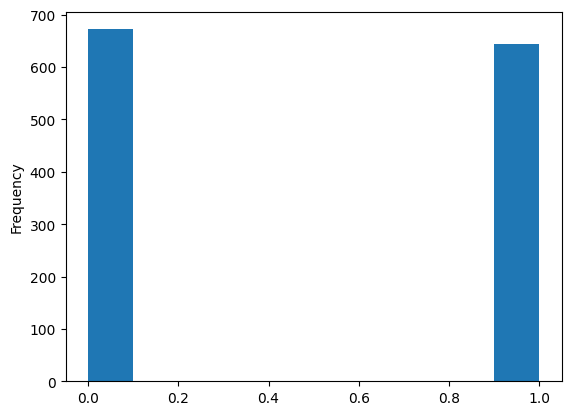

In [11]:
TourneyBoxScore.drop(TourneyBoxScore.columns[6:], axis=1, inplace=True)
import numpy as np
import random

random.seed(50)

# Rename columns
TourneyBoxScore.rename(columns={'WTeamID': 'ATeamID', 'WScore': 'AScore',
                   'LTeamID': 'BTeamID', 'LScore': 'BScore'}, inplace=True)

# Randomly swap ATeamID, AScore, BTeamID, and BScore for rows where BTeamID wins
mask = TourneyBoxScore['ATeamID'] > TourneyBoxScore['BTeamID']
random_indices = np.random.choice(mask.index, size=mask.sum(), replace=False)
TourneyBoxScore.loc[mask, ['ATeamID', 'AScore', 'BTeamID', 'BScore']] = TourneyBoxScore.loc[random_indices, ['BTeamID', 'BScore', 'ATeamID', 'AScore']].values

# Reset index
TourneyBoxScore.reset_index(drop=True, inplace=True)

TourneyBoxScore['A_Win'] = (TourneyBoxScore['AScore'] > TourneyBoxScore['BScore']).astype(int)

TourneyBoxScore['A_Win'].plot(kind = 'hist')
TourneyBoxScore

,Season,DayNum,ATeamID,AScore,BTeamID,BScore,A_Win,TeamID_A,OrdinalRank_A,TeamName_A,Wins_A,Losses_A,Seed_A,OffRating_A,DefRating_A,NetRating_A,eFG%_A,Opp_eFG%_A,TO%_A,Opp_TO%_A,Reb%_A,Opp_Reb%_A,FTr_A,Opp_FTr_A,Win%_A,TeamID_B,OrdinalRank_B,TeamName_B,Wins_B,Losses_B,Seed_B,OffRating_B,DefRating_B,NetRating_B,eFG%_B,Opp_eFG%_B,TO%_B,Opp_TO%_B,Reb%_B,Opp_Reb%_B,FTr_B,Opp_FTr_B,Win%_B
0,2003,136,1112,80,1436,51,1,1112,3.327717,Arizona,25.0,3.0,1,111.651848,92.174321,19.477528,0.514946,0.456378,0.193730,0.221181,0.540577,0.459423,0.266848,0.173385,0.892857,1436,170.607070,Vermont,19.0,10.0,16,103.419253,96.520822,6.898431,0.491667,0.477458,0.214624,0.198735,0.551622,0.448378,0.230247,0.191609,0.655172
1,2003,138,1112,96,1211,95,1,1112,3.327717,Arizona,25.0,3.0,1,111.651848,92.174321,19.477528,0.514946,0.456378,0.193730,0.221181,0.540577,0.459423,0.266848,0.173385,0.892857,1211,42.554627,Gonzaga,23.0,8.0,9,111.844569,98.417132,13.427437,0.534613,0.491112,0.211142,0.214618,0.545068,0.454932,0.320535,0.229931,0.741935
2,2003,143,1112,88,1323,71,1,1112,3.327717,Arizona,25.0,3.0,1,111.651848,92.174321,19.477528,0.514946,0.456378,0.193730,0.221181,0.540577,0.459423,0.266848,0.173385,0.892857,1323,10.585493,Notre Dame,22.0,9.0,5,111.046512,99.548940,11.497572,0.517012,0.461404,0.177102,0.182679,0.498529,0.501471,0.286018,0.176295,0.709677
3,2003,136,1113,84,1272,71,1,1113,40.043925,Arizona St,18.0,11.0,10,110.536879,99.950174,10.586705,0.513333,0.494424,0.203713,0.224215,0.539738,0.460262,0.308485,0.254027,0.620690,1272,40.445557,Memphis,23.0,6.0,7,106.768775,94.458189,12.310586,0.496264,0.453218,0.197628,0.216230,0.527009,0.472991,0.249425,0.231228,0.793103
4,2003,136,1141,79,1166,73,1,1141,74.433958,C Michigan,23.0,6.0,11,111.105746,102.559150,8.546596,0.570026,0.497619,0.255432,0.225012,0.520955,0.479045,0.365838,0.269048,0.793103,1166,17.103154,Creighton,29.0,4.0,6,115.249008,93.689320,21.559688,0.568829,0.475630,0.194359,0.248455,0.512306,0.487694,0.241561,0.211391,0.878788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,2023,137,1277,72,1425,62,1,1277,40.582618,Michigan St,19.0,12.0,7,104.915663,101.064344,3.851318,0.515510,0.480715,0.154217,0.141268,0.514241,0.485759,0.196842,0.206260,0.612903,1425,53.300462,USC,22.0,10.0,10,105.289331,96.980622,8.308709,0.513729,0.452418,0.170434,0.169896,0.501211,0.498789,0.251510,0.214249,0.687500
814,2023,137,1388,63,1433,51,1,1388,16.327076,St Mary's CA,25.0,7.0,5,110.726475,93.294461,17.432014,0.524499,0.467312,0.147733,0.181244,0.553372,0.446628,0.215479,0.227603,0.781250,1433,74.406765,VCU,27.0,7.0,12,104.833837,91.332195,13.501642,0.522277,0.469795,0.188606,0.222459,0.503145,0.496855,0.291529,0.214132,0.794118
815,2023,137,1388,55,1163,70,0,1388,16.327076,St Mary's CA,25.0,7.0,5,110.726475,93.294461,17.432014,0.524499,0.467312,0.147733,0.181244,0.553372,0.446628,0.215479,0.227603,0.781250,1163,9.574058,Connecticut,25.0,8.0,4,113.902332,93.793706,20.108625,0.534831,0.455432,0.179059,0.182692,0.578537,0.421463,0.237254,0.284680,0.757576
816,2023,144,1400,83,1462,71,1,1400,8.906535,Texas,26.0,8.0,2,109.697472,94.515464,15.182008,0.528104,0.478421,0.155408,0.215670,0.503970,0.496030,0.237537,0.249474,0.764706,1462,22.179912,Xavier,25.0,9.0,3,112.019425,102.150101,9.869324,0.556331,0.504306,0.169972,0.158621,0.546168,0.453832,0.220029,0.196172,0.735294


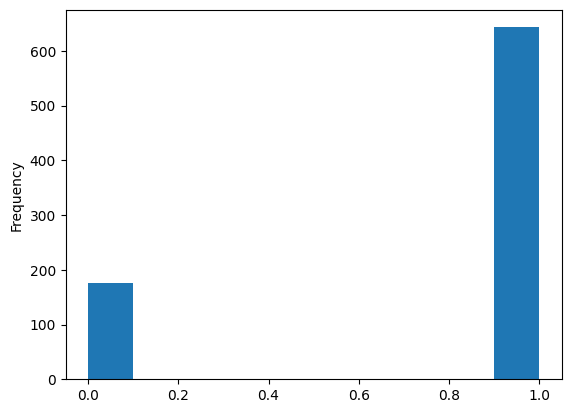

In [27]:
teamA = pd.merge(TourneyBoxScore, final_df2, left_on=['Season', 'ATeamID'], right_on=['Season', 'TeamID'], suffixes=('_A', ''))

final_df3 = pd.merge(teamA, final_df2, left_on=['Season', 'BTeamID'], right_on=['Season', 'TeamID'], suffixes=('_A', '_B'))

final_df3['A_Win'].plot(kind = 'hist')

final_df3

In the merging process, an unbalanced set of wins and losses was created. Check to see if SMOTE is needed for better results.

In [28]:
final = final_df3.iloc[:, 6:]
final = final.drop(columns = ['TeamID_A', 'TeamName_A', 'TeamID_B', 'TeamName_B'])
final

,A_Win,OrdinalRank_A,Wins_A,Losses_A,Seed_A,OffRating_A,DefRating_A,NetRating_A,eFG%_A,Opp_eFG%_A,TO%_A,Opp_TO%_A,Reb%_A,Opp_Reb%_A,FTr_A,Opp_FTr_A,Win%_A,OrdinalRank_B,Wins_B,Losses_B,Seed_B,OffRating_B,DefRating_B,NetRating_B,eFG%_B,Opp_eFG%_B,TO%_B,Opp_TO%_B,Reb%_B,Opp_Reb%_B,FTr_B,Opp_FTr_B,Win%_B
0,1,3.327717,25.0,3.0,1,111.651848,92.174321,19.477528,0.514946,0.456378,0.193730,0.221181,0.540577,0.459423,0.266848,0.173385,0.892857,170.607070,19.0,10.0,16,103.419253,96.520822,6.898431,0.491667,0.477458,0.214624,0.198735,0.551622,0.448378,0.230247,0.191609,0.655172
1,1,3.327717,25.0,3.0,1,111.651848,92.174321,19.477528,0.514946,0.456378,0.193730,0.221181,0.540577,0.459423,0.266848,0.173385,0.892857,42.554627,23.0,8.0,9,111.844569,98.417132,13.427437,0.534613,0.491112,0.211142,0.214618,0.545068,0.454932,0.320535,0.229931,0.741935
2,1,3.327717,25.0,3.0,1,111.651848,92.174321,19.477528,0.514946,0.456378,0.193730,0.221181,0.540577,0.459423,0.266848,0.173385,0.892857,10.585493,22.0,9.0,5,111.046512,99.548940,11.497572,0.517012,0.461404,0.177102,0.182679,0.498529,0.501471,0.286018,0.176295,0.709677
3,1,40.043925,18.0,11.0,10,110.536879,99.950174,10.586705,0.513333,0.494424,0.203713,0.224215,0.539738,0.460262,0.308485,0.254027,0.620690,40.445557,23.0,6.0,7,106.768775,94.458189,12.310586,0.496264,0.453218,0.197628,0.216230,0.527009,0.472991,0.249425,0.231228,0.793103
4,1,74.433958,23.0,6.0,11,111.105746,102.559150,8.546596,0.570026,0.497619,0.255432,0.225012,0.520955,0.479045,0.365838,0.269048,0.793103,17.103154,29.0,4.0,6,115.249008,93.689320,21.559688,0.568829,0.475630,0.194359,0.248455,0.512306,0.487694,0.241561,0.211391,0.878788
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,1,40.582618,19.0,12.0,7,104.915663,101.064344,3.851318,0.515510,0.480715,0.154217,0.141268,0.514241,0.485759,0.196842,0.206260,0.612903,53.300462,22.0,10.0,10,105.289331,96.980622,8.308709,0.513729,0.452418,0.170434,0.169896,0.501211,0.498789,0.251510,0.214249,0.687500
814,1,16.327076,25.0,7.0,5,110.726475,93.294461,17.432014,0.524499,0.467312,0.147733,0.181244,0.553372,0.446628,0.215479,0.227603,0.781250,74.406765,27.0,7.0,12,104.833837,91.332195,13.501642,0.522277,0.469795,0.188606,0.222459,0.503145,0.496855,0.291529,0.214132,0.794118
815,0,16.327076,25.0,7.0,5,110.726475,93.294461,17.432014,0.524499,0.467312,0.147733,0.181244,0.553372,0.446628,0.215479,0.227603,0.781250,9.574058,25.0,8.0,4,113.902332,93.793706,20.108625,0.534831,0.455432,0.179059,0.182692,0.578537,0.421463,0.237254,0.284680,0.757576
816,1,8.906535,26.0,8.0,2,109.697472,94.515464,15.182008,0.528104,0.478421,0.155408,0.215670,0.503970,0.496030,0.237537,0.249474,0.764706,22.179912,25.0,9.0,3,112.019425,102.150101,9.869324,0.556331,0.504306,0.169972,0.158621,0.546168,0.453832,0.220029,0.196172,0.735294


,OrdinalRank_A,Wins_A,Losses_A,Seed_A,OffRating_A,DefRating_A,NetRating_A,eFG%_A,Opp_eFG%_A,TO%_A,Opp_TO%_A,Reb%_A,Opp_Reb%_A,FTr_A,Opp_FTr_A,Win%_A,OrdinalRank_B,Wins_B,Losses_B,Seed_B,OffRating_B,DefRating_B,NetRating_B,eFG%_B,Opp_eFG%_B,TO%_B,Opp_TO%_B,Reb%_B,Opp_Reb%_B,FTr_B,Opp_FTr_B,Win%_B,A_Win
0,3.327717,25.000000,3.000000,1,111.651848,92.174321,19.477528,0.514946,0.456378,0.193730,0.221181,0.540577,0.459423,0.266848,0.173385,0.892857,170.607070,19.000000,10.000000,16,103.419253,96.520822,6.898431,0.491667,0.477458,0.214624,0.198735,0.551622,0.448378,0.230247,0.191609,0.655172,1
1,3.327717,25.000000,3.000000,1,111.651848,92.174321,19.477528,0.514946,0.456378,0.193730,0.221181,0.540577,0.459423,0.266848,0.173385,0.892857,42.554627,23.000000,8.000000,9,111.844569,98.417132,13.427437,0.534613,0.491112,0.211142,0.214618,0.545068,0.454932,0.320535,0.229931,0.741935,1
2,3.327717,25.000000,3.000000,1,111.651848,92.174321,19.477528,0.514946,0.456378,0.193730,0.221181,0.540577,0.459423,0.266848,0.173385,0.892857,10.585493,22.000000,9.000000,5,111.046512,99.548940,11.497572,0.517012,0.461404,0.177102,0.182679,0.498529,0.501471,0.286018,0.176295,0.709677,1
3,40.043925,18.000000,11.000000,10,110.536879,99.950174,10.586705,0.513333,0.494424,0.203713,0.224215,0.539738,0.460262,0.308485,0.254027,0.620690,40.445557,23.000000,6.000000,7,106.768775,94.458189,12.310586,0.496264,0.453218,0.197628,0.216230,0.527009,0.472991,0.249425,0.231228,0.793103,1
4,74.433958,23.000000,6.000000,11,111.105746,102.559150,8.546596,0.570026,0.497619,0.255432,0.225012,0.520955,0.479045,0.365838,0.269048,0.793103,17.103154,29.000000,4.000000,6,115.249008,93.689320,21.559688,0.568829,0.475630,0.194359,0.248455,0.512306,0.487694,0.241561,0.211391,0.878788,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,42.562895,23.491508,9.508492,11,111.886764,103.447998,8.438766,0.519221,0.496042,0.164046,0.179567,0.507519,0.492481,0.277533,0.186320,0.711864,48.087378,19.169497,13.661006,9,105.644936,100.858258,4.786678,0.530745,0.461409,0.205086,0.167344,0.522879,0.477121,0.232014,0.263352,0.584104,0
1282,44.790561,25.380055,6.619945,8,112.296380,96.417113,15.879267,0.529492,0.461718,0.177193,0.207241,0.519869,0.480131,0.281621,0.219715,0.793127,14.582864,26.000000,6.619945,2,118.991313,102.122116,16.869196,0.540861,0.473852,0.159757,0.169065,0.526425,0.473575,0.315568,0.210993,0.797685,0
1283,111.548902,21.000000,11.000000,13,108.256788,102.493837,5.762951,0.529052,0.472148,0.170847,0.135747,0.518966,0.481034,0.270329,0.231879,0.656250,10.729916,26.964384,5.035616,3,120.320932,102.009601,18.311332,0.584247,0.516033,0.142687,0.176835,0.536262,0.463738,0.240021,0.196262,0.842637,0
1284,24.105415,24.960570,7.582694,6,114.753980,101.131316,13.622664,0.543397,0.489581,0.193756,0.193435,0.529696,0.470304,0.309792,0.226848,0.763683,17.988366,24.708653,8.125958,4,110.583832,94.171681,16.412151,0.518902,0.451691,0.181980,0.235070,0.509239,0.490761,0.226033,0.260074,0.754146,0


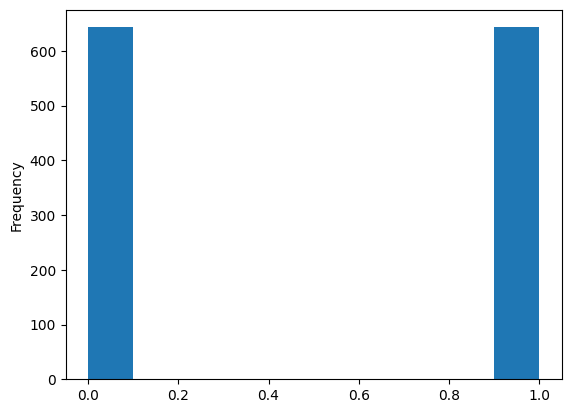

In [29]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming df is your DataFrame with features (X) and target variable (y)
# X should contain your feature columns, and y should contain your target variable column

# Separate features (X) and target variable (y)
X = final.drop(columns=['A_Win'])
y = final['A_Win']

# Instantiate SMOTE
smote = SMOTE()

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame with the resampled data
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['A_Win'])], axis=1)

# Now resampled_df contains the balanced dataset
resampled_df['A_Win'].plot(kind = 'hist')
resampled_df

In [75]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# 1. Prepare the Data
X = resampled_df.drop(columns=['A_Win'])
y = resampled_df['A_Win']

# 2. Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Instantiate the Logistic Regression Model
model = LogisticRegression()

# 4. Train the Model
model.fit(X_train, y_train)

# 5. Evaluate the Model
y_pred = model.predict(X_test)
print("Accuracy (before tuning):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 6. Tune Hyperparameters
# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Regularization penalty
    'solver': ['liblinear', 'saga']  # Solver for optimization
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
print("Accuracy (after tuning):", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy (before tuning): 0.689922480620155
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       124
           1       0.74      0.63      0.68       134

    accuracy                           0.69       258
   macro avg       0.69      0.69      0.69       258
weighted avg       0.70      0.69      0.69       258



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Hyperparameters: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy (after tuning): 0.6976744186046512
              precision    recall  f1-score   support

           0       0.66      0.77      0.71       124
           1       0.75      0.63      0.69       134

    accuracy                           0.70       258
   macro avg       0.70      0.70      0.70       258
weighted avg       0.70      0.70      0.70       258

Confusion Matrix:
[[95 29]
 [49 85]]


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [57]:
from sklearn.ensemble import RandomForestClassifier


# Define the parameter grid
rfparam_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instantiate the Random Forest Classifier Model
rfmodel = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
rfgrid_search = GridSearchCV(estimator=rfmodel, param_grid=rfparam_grid, cv=3, n_jobs=-1, verbose=2)

# Train the Model
rfgrid_search.fit(X_train, y_train)

# Get the best parameters
rfbest_params = rfgrid_search.best_params_
print("Best Parameters:", rfbest_params)

# Evaluate the Model
RFy_pred = rfgrid_search.predict(X_test)
print("Accuracy:", accuracy_score(y_test, RFy_pred))
print(classification_report(y_test, RFy_pred))

rfconf_matrix = confusion_matrix(y_test, RFy_pred)
print("Confusion Matrix:")
print(rfconf_matrix)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy: 0.8565891472868217
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       124
           1       0.89      0.82      0.86       134

    accuracy                           0.86       258
   macro avg       0.86      0.86      0.86       258
weighted avg       0.86      0.86      0.86       258

Confusion Matrix:
[[111  13]
 [ 24 110]]


In [32]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)  # Scale the features

X_train_nn, X_val, y_train_nn, y_val = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)
# Define lists of hyperparameters to try
num_nodes = [32, 64, 128]
dropout_rates = [0.2, 0.3, 0.5]
batch_sizes = [32, 64, 128]
epochs = [10, 20, 30]

best_accuracy = 0
NNbest_params = {}

# Iterate over hyperparameters
for nodes in num_nodes:
    for dropout_rate in dropout_rates:
        for batch_size in batch_sizes:
            for num_epochs in epochs:
                # Define the model
                NNmodel = Sequential()
                NNmodel.add(Dense(nodes, input_shape=(32,), activation='relu'))
                NNmodel.add(Dense(nodes, activation='relu'))
                NNmodel.add(Dropout(dropout_rate))
                NNmodel.add(Dense(1, activation='sigmoid'))
                NNmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

                # Train the model
                history = NNmodel.fit(X_train_nn, y_train_nn, epochs=num_epochs, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)

                # Evaluate the model
                _, accuracy = NNmodel.evaluate(X_val, y_val, verbose=0)

                # Check if current model is better than previous best
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    NNbest_params = {'Nodes': nodes, 'Dropout Rate': dropout_rate, 'Batch Size': batch_size, 'Epochs': num_epochs}

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:", NNbest_params)
print("Best Accuracy:", best_accuracy)

# Define the best hyperparameters found during the search
best_nodes = NNbest_params['Nodes']
best_dropout_rate = NNbest_params['Dropout Rate']

best_batch_size = NNbest_params['Batch Size']
best_epochs = NNbest_params['Epochs']

# Define and compile the final model with the best hyperparameters
final_model = Sequential()
final_model.add(Dense(best_nodes, input_shape=(32,), activation='relu'))
final_model.add(Dense(best_nodes, activation='relu'))
final_model.add(Dropout(best_dropout_rate))
final_model.add(Dense(1, activation='sigmoid'))
final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the final model with the best hyperparameters
final_history = final_model.fit(X_train_nn, y_train_nn, epochs=best_epochs, batch_size=best_batch_size, validation_data=(X_val, y_val), verbose=0)

# Evaluate the final model
final_loss, final_accuracy = final_model.evaluate(X_val, y_val, verbose=0)
print("Final Model Accuracy:", final_accuracy)

# Predict labels using the trained model
y_pred_nn = final_model.predict(X_val)
y_pred_nn_binary = (y_pred_nn > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate the confusion matrix
conf_matrix_nn = confusion_matrix(y_val, y_pred_nn_binary)

# Print the confusion matrix
print("Confusion Matrix for Neural Network Model:")
print(conf_matrix_nn)

Best Hyperparameters: {'Nodes': 128, 'Dropout Rate': 0.3, 'Batch Size': 32, 'Epochs': 30}
Best Accuracy: 0.8398058414459229
Final Model Accuracy: 0.8155339956283569
7/7 [==============================] - 0s 4ms/step
Confusion Matrix for Neural Network Model:
[[83 19]
 [19 85]]


# Model Analysis

- Logistic Regression Model

Required little computation time but returned with an overall accuracy score about 70%. Losing a bit by predicting a lot of losses that were actually wins for teamA

- Random Forest

Best algorithm!! Returned accuracy over 85% and had over 100 for true negative and true positive cases of wins and losses!

- Neural Network

Very solid as well! Accuracy around 83% and comparable results to RandomForest, with some data lost to scaling process. Also cool to see probabilities returned for likelihood of team win instead of 0 or 1. Was more computationally expensive than Random Forest so the Random Forest model will be the go to for this project.

# Actual Results

(9) Michigan State 66, (8) Mississippi State 51

(11) Duquesne 71, (6) BYU 67

(3) Creighton 77, (14) Akron 60

(2) Arizona 85, (15) Long Beach State 65

(1) North Carolina 90, (16) Wagner 61

(3) Illinois 85, (14) Morehead State 69

(11) Oregon 87, (6) South Carolina 73

(7) Dayton 63, (10) Nevada 60

(7) Texas 56, (10) Colorado State 44

(14) Oakland 80, (3) Kentucky 76

(5) Gonzaga 86, (12) McNeese 65

(2) Iowa State 82, (15) South Dakota State 65

(2) Tennessee 83, (15) Saint Peter's 49

(7) Washington State 66, (10) Drake 61

(11) NC State 80, (6) Texas Tech 67

(4) Kansas 93, (13) Samford 89


(3) Baylor 92, (14) Colgate 67

(9) Northwestern 77, (8) Florida Atlantic 65 (OT)

(5) San Diego State 69, (12) UAB 65

(2) Marquette 87, (15) Western Kentucky 69

(1) UConn 91, (16) Stetson 52

(6) Clemson 77, (11) New Mexico 56

(10) Colorado 102, (7) Florida 100  

(13) Yale 78, (4) Auburn 76

(9) Texas A&M 98, (8) Nebraska 83

(4) Duke 64, (13) Vermont 47

(1) Purdue 78, (16) Grambling 50

(4) Alabama 109, (13) College of Charleston 96

(1) Houston 86, (16) Longwood 46

(12) James Madison 72, (5) Wisconsin 61

(8) Utah State 88, (9) TCU 72

(12) Grand Canyon 77, (5) Saint Mary's 66

In [81]:
# just the mens tournament, women's tournament didnt have Rankings for the womens teams available

Seeds2024 = Seeds2024[Seeds2024['Tournament'] != 'W']


TourneySlots2024 = TourneySlots[TourneySlots['Season'] == 2024]

## Going back to get merged stats to create submission for 2024 tournament

attempt = final_df2[final_df2['Season'] == 2024]
attempt = pd.merge(attempt, Seeds2024, on = 'TeamID', how = 'inner')
attempt = pd.merge(attempt, TourneySlots2024, left_on = 'Seed_y', right_on = 'StrongSeed')
attempt2 = pd.merge(attempt, TourneySlots2024, left_on='Seed_y', right_on='WeakSeed')

again = final_df2[final_df2['Season'] == 2024]

result = pd.concat([attempt, attempt2], ignore_index=True)
result = result.dropna(axis = 1)
result = pd.merge(result, Seeds2024, left_on = 'WeakSeed', right_on = 'Seed')
result = pd.merge(result, again, left_on = 'TeamID_y', right_on = 'TeamID', suffixes=('_A', '_B'))
dropcolumns = ['Season_x', 'Tournament_x', 'Tournament_y', 'TeamID', 'Season', 'Season_y',
               'Seed_y', 'Seed_A']
Bracket = result.drop(columns= dropcolumns)
Bracket.rename(columns={'Seed_x': 'Seed_A'}, inplace=True)

Round1 = Bracket.drop(columns = ['TeamID_x', 'TeamName_A', 'TeamID_y', 'TeamName_B', 'Slot', 'StrongSeed', 'WeakSeed'])


#Random Forest predict round of 64!!!

round1pred = rfgrid_search.predict(Round1)
Bracket['PredA_Win'] = round1pred

Bracket['Winner'] = Bracket.apply(lambda row: row['TeamName_A'] if row['PredA_Win'] == 1 else row['TeamName_B'], axis=1)

ActualWinners = ['Michigan State', 'Duquesne', 'Creighton', 'Arizona','North Carolina',
'Illinois', 'Oregon', 'Dayton', 'Texas', 'Oakland', 'Gonzaga', 'Iowa St', 'Tennessee',
'Washington St', 'NC State', 'Kansas', 'Baylor', 'Northwestern', 'San Diego St',
'Marquette', 'Connecticut', 'Clemson', 'Colorado', 'Yale', 'Texas A&M', 'Duke', 'Purdue',
'Alabama', 'Houston', 'James Madison', 'Utah St', 'Grand Canyon']


Bracket['Winner'] = Bracket['Winner'].astype(str)

matches_in_bracket = Bracket['Winner'].isin(ActualWinners)
print(matches_in_bracket.sum())

round1_accuracy = matches_in_bracket.sum() / 32
print(round1_accuracy)

21
0.65625


# Final Analysis

For the round of 64 the highest performing model available, the random forest, was used to try and predict winning teams. In some iterations the model was able to correctly identify some upsets, but currently it picked all the higher seeded teams. Making it 21/32 in the first round of games for an accuracy of 65.6%


The model was unable to be tested against later rounds of action to create a full bracket due to many technical issues trying to set up additional dfs like this first one. This code will be revisited in the future to test out more games as the potential for a model capable of 85+% accuracy on march madness games needs to be explored.

Overall, the project has been a resounding success in being able to create not 1 but 2 models that can accurately predict winners of insanely difficult to forecast march madness games, and with even more data to come available in future games, these models is seeking to improve even more.